In [1]:
import sys
sys.path.append("../")
from mir.common.parser import *
from mir.common.repertoire import Repertoire, RepertoireDataset
from mir.basic.segment_usage import *
import time

In [2]:
from sklearn.manifold import TSNE

In [3]:
metadata = pd.read_csv('assets/samples/fmba_healthy/metadata.csv')
metadata

,sequencingDate,folder,R1,R2,name,COVID_status,projectName,COVID_IgG,COVID_IgM,COVID_PCR,...,HLA-DQB1.2,HLA-DRB1.1,HLA-DRB1.2,id,subsequent_sequencing,HLA-DRB4.1,HLA-DRB3.1,HLA-DRB5.1,gene,run
0,2020 10 19,2020/10_FMBA_NovaSeq6,770101520808_S102_L002_R1_001.fastq.gz,770101520808_S102_L002_R2_001.fastq.gz,770101520808,healthy,FMBA_DNA,no,no,negative,...,DQB1*06:02,DRB1*11:04,DRB1*15:01,770101520,NaN,NaN,NaN,NaN,NaN,770101520808_S102_L002.clonotypes.TRB.txt
1,2020 10 19,2020/10_FMBA_NovaSeq6,500001210807_S66_L001_R1_001.fastq.gz,500001210807_S66_L001_R2_001.fastq.gz,500001210807,healthy,FMBA_DNA,no,no,negative,...,DQB1*04:02,DRB1*07:01,DRB1*08:01,500001210,NaN,NaN,NaN,NaN,NaN,500001210807_S66_L001.clonotypes.TRB.txt
2,2020 10 19,2020/10_FMBA_NovaSeq6,500002190807_S8_L001_R1_001.fastq.gz,500002190807_S8_L001_R2_001.fastq.gz,500002190807,healthy,FMBA_DNA,no,no,negative,...,DQB1*04:02,DRB1*07:01,DRB1*08:01,500002190,NaN,NaN,NaN,NaN,NaN,500002190807_S8_L001.clonotypes.TRB.txt
3,2020 10 19,2020/10_FMBA_NovaSeq4,780003510808_S92_L001_R1_001.fastq.gz,780003510808_S92_L001_R2_001.fastq.gz,780003510808,healthy,FMBA_DNA,no,no,negative,...,DQB1*03:03,DRB1*07:01,DRB1*07:01,780003510,NaN,NaN,NaN,NaN,NaN,780003510808_S92_L001.clonotypes.TRB.txt
4,2020 10 19,2020/10_FMBA_NovaSeq4,550001610808_S148_L002_R1_001.fastq.gz,550001610808_S148_L002_R2_001.fastq.gz,550001610808,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:01,DRB1*01:01,DRB1*11:04,550001610,NaN,NaN,NaN,NaN,NaN,550001610808_S148_L002.clonotypes.TRB.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020 10 19,2020/10_FMBA_NovaSeq5,270000140808_S174_L002_R1_001.fastq.gz,270000140808_S174_L002_R2_001.fastq.gz,270000140808,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:02,DRB1*16:01,DRB1*16:01,270000140,NaN,NaN,NaN,NaN,NaN,270000140808_S174_L002.clonotypes.TRB.txt
96,2020 10 19,2020/10_FMBA_NovaSeq5,500001400808_S155_L002_R1_001.fastq.gz,500001400808_S155_L002_R2_001.fastq.gz,500001400808,healthy,FMBA_DNA,no,no,negative,...,DQB1*06:01,DRB1*07:01,DRB1*15:02,500001400,NaN,NaN,NaN,NaN,NaN,500001400808_S155_L002.clonotypes.TRB.txt
97,2020 10 19,2020/10_FMBA_NovaSeq6,780004000807_S5_L001_R1_001.fastq.gz,780004000807_S5_L001_R2_001.fastq.gz,780004000807,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:01,DRB1*01:01,DRB1*04:01,780004000,NaN,NaN,NaN,NaN,NaN,780004000807_S5_L001.clonotypes.TRB.txt
98,2020 10 19,2020/10_FMBA_NovaSeq4,550001850808_S122_L002_R1_001.fastq.gz,550001850808_S122_L002_R2_001.fastq.gz,550001850808,healthy,FMBA_DNA,no,no,negative,...,DQB1*05:01,DRB1*01:01,DRB1*04:01,550001850,NaN,NaN,NaN,NaN,NaN,550001850808_S122_L002.clonotypes.TRB.txt


In [4]:
t0 = time.time()
dataset = RepertoireDataset.load(parser=VDJtoolsParser(sep=','), 
                                 metadata=metadata,
                                 threads=28,
                                 paths=['assets/samples/fmba_healthy/' + r['run'] + '.gz'
                                        for _, r in metadata.iterrows()])
print(time.time() - t0)


57.93352961540222


In [5]:
dataset.evaluate_segment_usage()

,TRBV7-4*01,TRBV19*01,TRBJ1-6*01,TRBV12-1*01,TRBV7-6*01,TRBV30*01,TRBV16*01,TRBV9*01,TRBV5-6*01,TRBV10-1*01,...,TRBJ1-1*01,TRBV5-7*01,TRBJ2-3*01,TRBV6-7*01,TRBV2*01,TRBV29-1*01,TRBV6-9*01,TRBV13*01,TRBV14*01,TRBJ1-3*01
0,33,1318,1248,25,259,338,0,915,410,156,...,3473,15,2360,39,825,459,10,77,298,999
1,13,409,268,7,94,211,0,252,127,58,...,786,16,959,7,171,161,11,33,122,255
2,22,600,483,10,166,313,0,350,174,83,...,1260,5,1216,23,397,235,15,44,147,329
3,10,174,153,2,32,59,0,115,51,35,...,393,6,470,4,114,72,8,31,71,120
4,31,1146,936,23,242,686,0,953,404,204,...,2868,12,2490,25,837,431,26,129,250,808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,42,1587,1208,26,347,391,0,859,529,286,...,3210,15,3016,38,1007,512,17,124,374,908
96,16,250,202,8,60,54,0,161,85,51,...,600,4,674,7,239,115,5,38,88,154
97,16,602,475,13,90,329,0,349,214,93,...,1883,8,413,13,232,235,5,75,135,453
98,18,596,392,13,118,344,1,448,158,156,...,1308,5,1453,11,279,224,6,58,138,382


In [6]:
folder_to_run_mapping = {}
for folder in dataset.metadata[['run', 'folder']].folder.unique():
    folder_to_run_mapping[folder] = set(dataset.metadata[dataset.metadata.folder == folder].run)

In [7]:
log_exp_usage_table = StandardizedSegmentUsageTable.load_from_repertoire_dataset(repertoire_dataset=dataset, gene='TRB', segment_type='V', group_mapping=folder_to_run_mapping, standardization_method='log_exp')
z_score_usage_table = StandardizedSegmentUsageTable.load_from_repertoire_dataset(repertoire_dataset=dataset, gene='TRB', segment_type='V', group_mapping=folder_to_run_mapping, standardization_method='z_score')
norm_usage_table = NormalizedSegmentUsageTable.load_from_repertoire_dataset(repertoire_dataset=dataset, gene='TRB', segment_type='V')


In [8]:
norm_usage_table.segment_usage_matrix

,TRBV7-4*01,TRBV19*01,TRBV12-1*01,TRBV7-6*01,TRBV30*01,TRBV16*01,TRBV9*01,TRBV5-6*01,TRBV10-1*01,TRBV23-1*01,...,TRBV12-2*01,TRBV24-1*01,TRBV25-1*01,TRBV5-7*01,TRBV6-7*01,TRBV2*01,TRBV29-1*01,TRBV6-9*01,TRBV13*01,TRBV14*01
0,0.001425,0.056916,0.001080,0.011185,0.014596,0.000000,0.039513,0.017705,0.006737,0.006996,...,0.002159,0.015201,0.006218,0.000648,0.001684,0.035626,0.019821,0.000432,0.003325,0.012869
1,0.001768,0.055608,0.000952,0.012780,0.028688,0.000000,0.034262,0.017267,0.007886,0.005031,...,0.001224,0.016179,0.009925,0.002175,0.000952,0.023249,0.021890,0.001496,0.004487,0.016587
2,0.001999,0.054521,0.000909,0.015084,0.028442,0.000000,0.031804,0.015811,0.007542,0.005270,...,0.002272,0.018810,0.011268,0.000454,0.002090,0.036075,0.021354,0.001363,0.003998,0.013358
3,0.002743,0.047737,0.000549,0.008779,0.016187,0.000000,0.031550,0.013992,0.009602,0.004664,...,0.002195,0.020850,0.005761,0.001646,0.001097,0.031276,0.019753,0.002195,0.008505,0.019479
4,0.001390,0.051388,0.001031,0.010852,0.030761,0.000000,0.042734,0.018116,0.009148,0.007130,...,0.003184,0.021479,0.009955,0.000538,0.001121,0.037532,0.019326,0.001166,0.005784,0.011210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001620,0.061208,0.001003,0.013383,0.015080,0.000000,0.033130,0.020403,0.011031,0.007829,...,0.002661,0.016932,0.008099,0.000579,0.001466,0.038838,0.019747,0.000656,0.004782,0.014425
96,0.003069,0.047957,0.001535,0.011510,0.010359,0.000000,0.030884,0.016305,0.009783,0.007673,...,0.002494,0.019950,0.004988,0.000767,0.001343,0.045847,0.022060,0.000959,0.007289,0.016881
97,0.001617,0.060857,0.001314,0.009098,0.033259,0.000000,0.035281,0.021634,0.009402,0.007076,...,0.002123,0.025677,0.012030,0.000809,0.001314,0.023453,0.023757,0.000505,0.007582,0.013647
98,0.001522,0.050389,0.001099,0.009976,0.029084,0.000085,0.037876,0.013358,0.013189,0.007186,...,0.002452,0.019614,0.011414,0.000423,0.000930,0.023588,0.018938,0.000507,0.004904,0.011667


In [9]:
dataset.segment_usage_matrix

,TRBV7-4*01,TRBV19*01,TRBJ1-6*01,TRBV12-1*01,TRBV7-6*01,TRBV30*01,TRBV16*01,TRBV9*01,TRBV5-6*01,TRBV10-1*01,...,TRBJ1-1*01,TRBV5-7*01,TRBJ2-3*01,TRBV6-7*01,TRBV2*01,TRBV29-1*01,TRBV6-9*01,TRBV13*01,TRBV14*01,TRBJ1-3*01
0,33,1318,1248,25,259,338,0,915,410,156,...,3473,15,2360,39,825,459,10,77,298,999
1,13,409,268,7,94,211,0,252,127,58,...,786,16,959,7,171,161,11,33,122,255
2,22,600,483,10,166,313,0,350,174,83,...,1260,5,1216,23,397,235,15,44,147,329
3,10,174,153,2,32,59,0,115,51,35,...,393,6,470,4,114,72,8,31,71,120
4,31,1146,936,23,242,686,0,953,404,204,...,2868,12,2490,25,837,431,26,129,250,808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,42,1587,1208,26,347,391,0,859,529,286,...,3210,15,3016,38,1007,512,17,124,374,908
96,16,250,202,8,60,54,0,161,85,51,...,600,4,674,7,239,115,5,38,88,154
97,16,602,475,13,90,329,0,349,214,93,...,1883,8,413,13,232,235,5,75,135,453
98,18,596,392,13,118,344,1,448,158,156,...,1308,5,1453,11,279,224,6,58,138,382


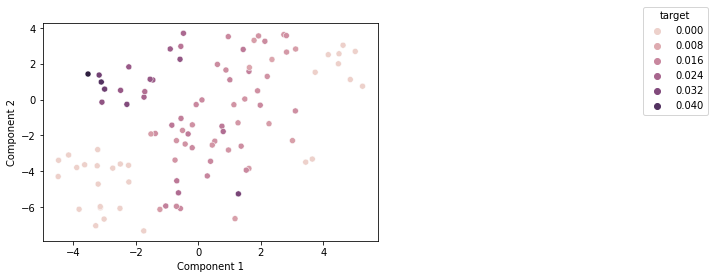

In [10]:
norm_usage_table.plot_pca_results_colored_by(target=norm_usage_table.segment_usage_matrix['TRBV4-3*01'], method=TSNE)

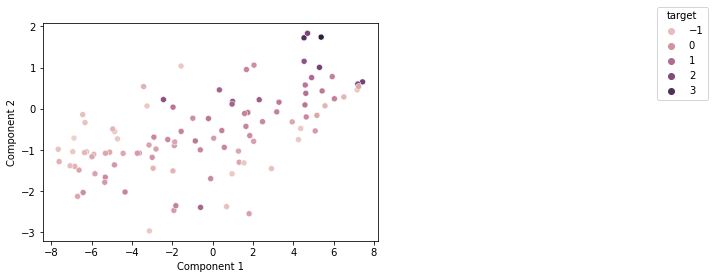

In [11]:
z_score_usage_table.plot_pca_results_colored_by(target=z_score_usage_table.segment_usage_matrix['TRBV4-3*01'], method=TSNE)

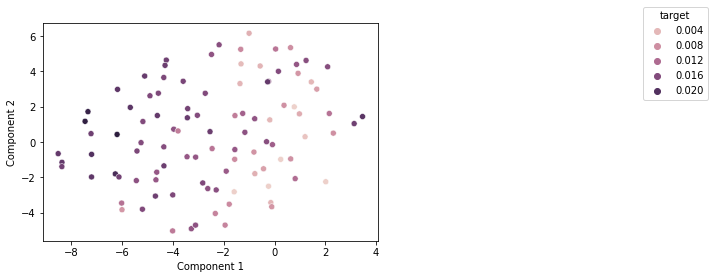

In [12]:
log_exp_usage_table.plot_pca_results_colored_by(target=log_exp_usage_table.segment_usage_matrix['TRBV4-3*01'], method=TSNE)

/home/evlasova/mirpy/notebooks/../mir/basic/segment_usage.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_data[gene] = (self.segment_usage_matrix[gene] - self.segment_usage_matrix[gene].min()) / (


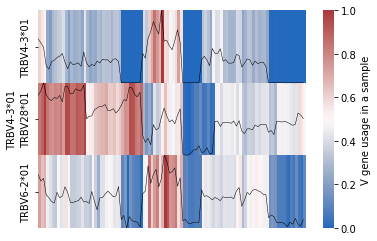

In [13]:
norm_usage_table.plot_clustermap_axes_based(genes=['TRBV4-3*01', 'TRBV28*01', 'TRBV6-2*01'])

/home/evlasova/mirpy/notebooks/../mir/basic/segment_usage.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_data[gene] = (self.segment_usage_matrix[gene] - self.segment_usage_matrix[gene].min()) / (


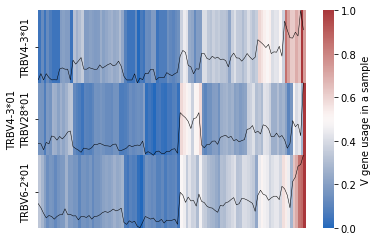

In [14]:
z_score_usage_table.plot_clustermap_axes_based(genes=['TRBV4-3*01', 'TRBV28*01', 'TRBV6-2*01'])

/home/evlasova/mirpy/notebooks/../mir/basic/segment_usage.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_data[gene] = (self.segment_usage_matrix[gene] - self.segment_usage_matrix[gene].min()) / (


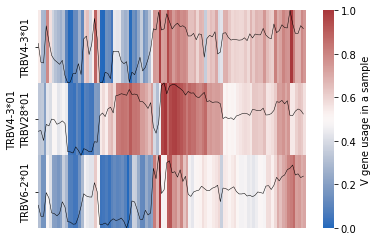

In [15]:
log_exp_usage_table.plot_clustermap_axes_based(genes=['TRBV4-3*01', 'TRBV28*01', 'TRBV6-2*01'])